In [20]:
using PyCall
using PyPlot
using LaTeXStrings
using LinearAlgebra

In [21]:
mp = pyimport("mpmath")

PyObject <module 'mpmath' from '/home/arurz/.local/lib/python3.6/site-packages/mpmath/__init__.py'>

In [22]:
rc("text", usetex=true)

In [23]:
N = 32
dim = N+1
k = 1

t_list = range(0,stop=61,length=61)

;

In [24]:
function pint(a)
    pv = zeros(Float64,dim)
    for j in 0:N
        if a == j
            pv[j+1] = 1
        else
            pv[j+1] = 0
        end
    end
    return pv
end

pint (generic function with 1 method)

In [6]:
function cheb(n,x)
    return convert(Float64,mp.chebyu(n,x))
end

function phi(j)
    return pi*j/(N+2)
end

function y(j)
    return cos(phi(j))
end

function osc(t,j)
    return cos(2*t*sqrt(k)*sin(phi(j+1)/2))
end

function deno(j)
    sv = zeros(Float64,dim)
    for s in 0:N 
        sv[s+1] = cheb(s,y(j+1))^2
    end
    return sum(sv)
end

function multcheb(n,l,j)
    return cheb(n,y(j+1))*cheb(l,y(j+1))
end

;

In [7]:
dnom = zeros(Float64,dim)
@time for j in 0:N
    dnom[j+1]=deno(j)
end

  0.656597 seconds (496.35 k allocations: 23.993 MiB, 3.17% gc time)


In [8]:
mcheb = zeros(Float64,(dim,dim,dim))
@time for n in 0:N
    for l in 0:N
        for j in 0:N
            mcheb[n+1,l+1,j+1]=multcheb(n,l,j)
        end
    end
end

 16.830050 seconds (1.59 M allocations: 43.613 MiB, 0.32% gc time)


In [9]:
oscm = zeros(Float64,(dim,length(t_list)))
@time for t in 1:length(t_list)
    for j in 0:N
        oscm[j+1,t]=osc(t_list[t],j)
    end
end

  0.131621 seconds (128.66 k allocations: 5.356 MiB)


In [10]:
icond1 = normalize(pint(0))

function q1(t,n)
    mevol = zeros(Float64,(dim,dim))
    for l in 0:N
        for j in 0:N
            mevol[l+1,j+1] = (mcheb[n,l+1,j+1]/dnom[j+1])*oscm[j+1,t]*icond1[l+1]
        end
    end
    return sum(mevol)
end

icond2 = normalize(pint(8)+pint(24))

function q2(t,n)
    mevol = zeros(Float64,(dim,dim))
    for l in 0:N
        for j in 0:N
            mevol[l+1,j+1] = (mcheb[n,l+1,j+1]/dnom[j+1])*oscm[j+1,t]*icond2[l+1]
        end
    end
    return sum(mevol)
end

icond3 = normalize(pint(16))

function q3(t,n)
    mevol = zeros(Float64,(dim,dim))
    for l in 0:N
        for j in 0:N
            mevol[l+1,j+1] = (mcheb[n,l+1,j+1]/dnom[j+1])*oscm[j+1,t]*icond3[l+1]
        end
    end
    return sum(mevol)
end


;

In [11]:
evolt1 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt1[n+1,t] = q1(t,n+1)
    end
end

evolt2 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt2[n+1,t] = q2(t,n+1)
    end
end

evolt3 = zeros(Float64,(dim,length(t_list)))
for t in 1:length(t_list)
    for n in 0:N    
       evolt3[n+1,t] = q3(t,n+1)
    end
end

In [14]:
vminh= -1 #minimum((minimum(evolt1),minimum(evolt2),minimum(evolt3)))
vmaxh= maximum((maximum(evolt1),maximum(evolt2),maximum(evolt3)))
;

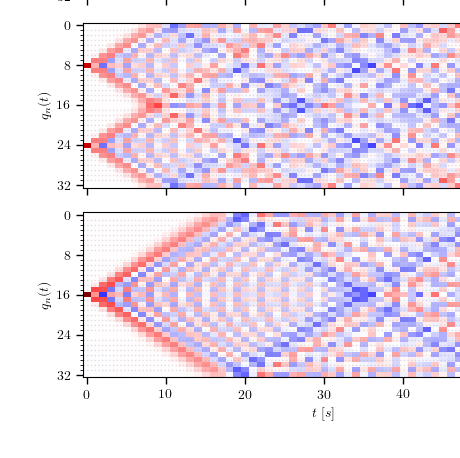

In [51]:
cm = "seismic"

ww = 6.20
hh = ww

fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(ww,hh),sharex=true)
plt.subplots_adjust(hspace = 0.1)

ax1.imshow(evolt1,vmin=vminh,vmax=vmaxh,cmap=cm)
ax2.imshow(evolt2,vmin=vminh,vmax=vmaxh,cmap=cm)
ax3.imshow(evolt3,vmin=vminh,vmax=vmaxh,cmap=cm)

ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")

ax1.tick_params(direction="out",length=5,width=1,labelsize=10)
ax2.tick_params(direction="out",length=5,width=1,labelsize=10)
ax3.tick_params(direction="out",length=5,width=1,labelsize=10)

ax1.set_yticks(0:8:N, minor = false)
ax2.set_yticks(0:8:N, minor = false)
ax3.set_yticks(0:8:N, minor = false)

ax1.set_yticks(1:1:N, minor = true)
ax1.grid(which = "minor", color = "gray", linestyle = ":", linewidth = 1, alpha = 0.25)
ax2.set_yticks(1:1:N, minor = true)
ax2.grid(which = "minor", color = "gray", linestyle = ":", linewidth = 1, alpha = 0.25)
ax3.set_yticks(1:1:N, minor = true)
ax3.grid(which = "minor", color = "gray", linestyle = ":", linewidth = 1, alpha = 0.25)

ax1.set_ylabel(L"q_{n}(t)",fontsize=10)
ax2.set_ylabel(L"q_{n}(t)",fontsize=10)
ax3.set_ylabel(L"q_{n}(t)",fontsize=10)

ax3.set_xlabel(L"t\ [s]",fontsize=10)

pcm = ax1.get_children()[10]
cb = colorbar(pcm,ax=(ax1,ax2,ax3),extend="both",ticks=[-1,-0.5,0,0.5,1],orientation="vertical",shrink=0.7,aspect=35,fraction=0.015)
cb.ax.tick_params(labelsize=10,length=5,width=1,direction="inout")
#cb.ax.set_ylabel("Amplitud",fontsize=12,labelpad=0)

tight_layout(rect=(0, 0, 0.9, 1))
show()

savefig("lin_vd.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)